# Bounding Box Prediction from Scratch using PyTorch
Building a bounding box prediction model from scratch using PyTorch involves creating a neural network that learns to localize objects within images. This task typically employs a convolutional neural network (CNN) architecture to capture spatial hierarchies. The model is trained on a dataset with annotated bounding boxes. During training, the network refines its parameters through backpropagation, minimizing the difference between predicted and ground truth bounding boxes. Key components include image preprocessing, defining the neural network architecture with regression outputs for box coordinates, and optimizing with a loss function. Implementing such models enhances computer vision applications, enabling accurate object localization and detection.

#### Drop an upvote if you learn something from this notebok :)

# What is Bounding Box Detection?

Bounding box detection is a fundamental computer vision task that involves identifying and localizing objects within an image. Instead of merely classifying objects, as in image classification, bounding box detection provides a more detailed understanding of the spatial extent of each object. This information is crucial for various applications, from autonomous vehicles to video surveillance.



### Importing Libraries
- torch: PyTorch library for deep learning.

- torchvision: A PyTorch package that provides datasets, models, and transforms for computer vision tasks.
- transforms from torchvision: Functions for image transformations.
- cv2: OpenCV library for computer vision tasks.

In [1]:
import torch
import torchvision
from torchvision import transforms as T
import cv2


#### Loading the pretrained model
model = torchvision.models.detection.ssd300_vgg16(pretrained=True): Loads a pre-trained SSD model with a VGG16 backbone. The pretrained=True argument loads the weights trained on a large dataset.



In [2]:
model = torchvision.models.detection.ssd300_vgg16(pretrained = True)
model.eval()


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:00<00:00, 152MB/s]


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

This code snippet utilizes PyTorch and torchvision to load a pre-trained Single Shot Multibox Detector (SSD) model with a VGG16 backbone. The pretrained=True argument downloads and initializes the model with weights pre-trained on a large dataset. The model.eval() sets the model in evaluation mode, disabling features like dropout to ensure consistent behavior during inference. This pre-trained SSD300_VGG16 model is designed for object detection tasks and is ready for use in detecting objects within images.



In [3]:
classnames = []
with open('/kaggle/input/coco-classes/classes.txt','r') as f:
    classnames = f.read().splitlines()
# This code reads the contents of a text file named “classes.txt” 
# located at the path and stores each line as an element in 
# the list classnames. The splitlines() method is then used to 
# separate the lines from the file and populate the list with class names.



**load_image(image_path) function:**
    
    Takes a file path (image_path) as an argument.
    Uses OpenCV (cv2) to read the image from the specified path.
    Returns the loaded image.

**transform_image(image) function:**
    
    Takes an image as input.
    Uses torchvision’s ToTensor() transformation to convert the image to a PyTorch tensor.
    Returns the transformed image tensor.


In [4]:
def load_image(image_path):
	image = cv2.imread(image_path)
	return image

def transform_image(image):
	img_transform = T.ToTensor()
	image_tensor = img_transform(image)
	return image_tensor



The load_image function reads an image from the specified path using OpenCV’s cv2.imread and returns the image. 

The transform_image function uses torchvision’s ToTensor transformation to convert the input image (in OpenCV format) into a PyTorch tensor.

**Making Predictions**

detect_objects(model, image_tensor, confidence_threshold=0.80) function

- Takes an object detection model (model), an image tensor (image_tensor), and an optional confidence threshold (default is 0.80) as arguments.
- Uses the provided model to make predictions on the input image tensor.
- Filters the predicted bounding boxes, scores, and labels based on the specified confidence threshold.
- Returns filtered bounding boxes, scores, and labels.


In [5]:
def detect_objects(model, image_tensor, confidence_threshold=0.80):
	with torch.no_grad():
		y_pred = model([image_tensor])

	bbox, scores, labels = y_pred[0]['boxes'], y_pred[0]['scores'], y_pred[0]['labels']
	indices = torch.nonzero(scores > confidence_threshold).squeeze(1)

	filtered_bbox = bbox[indices]
	filtered_scores = scores[indices]
	filtered_labels = labels[indices]

	return filtered_bbox, filtered_scores, filtered_labels


This function detect_objects takes a pre-trained object detection model (model) and an input image tensor (image_tensor). It performs inference with the model, filters the predicted bounding boxes, scores, and labels based on a confidence threshold (default is 0.80), and returns the filtered results. The filtered results include bounding boxes (filtered_bbox), corresponding scores (filtered_scores), and class labels (filtered_labels). This allows for identifying objects in the image with confidence scores exceeding the specified threshold.



Drawing Bounding Boxes
draw_boxes_and_labels(image, bbox, labels, class_names) function:

- Takes an image, bounding boxes, labels, and class names as arguments.
- Creates a copy of the input image (img_copy) to avoid modifying the original image.
- Iterates over each bounding box in the provided list.
- Draws a rectangle around the object using OpenCV based on the bounding box coordinates.
- Retrieves the class index and corresponding class name from the provided lists.
- Adds text to the image indicating the detected class.
- Returns the modified image.


In [6]:
def draw_boxes_and_labels(image, bbox, labels, class_names):
	img_copy = image.copy()

	for i in range(len(bbox)):
		x, y, w, h = bbox[i].numpy().astype('int')
		cv2.rectangle(img_copy, (x, y), (w, h), (0, 0, 255), 5)

		class_index = labels[i].numpy().astype('int')
		class_detected = class_names[class_index - 1]

		cv2.putText(img_copy, class_detected, (x, y + 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2, cv2.LINE_AA)

	return img_copy

# The function draw_boxes_and_labels overlays bounding boxes 
# and class labels on an image copy. It iterates through the 
# provided bounding boxes (bbox), labels (labels), and class 
# names (class_names). For each detected object, it draws a red 
# bounding box and prints the corresponding class label in green 
# on the image. The modified image copy is then returned.



In [7]:
!pip uninstall opencv-python-headless -y 
!pip install opencv-python --upgrade


Found existing installation: opencv-python-headless 4.10.0.82
Uninstalling opencv-python-headless-4.10.0.82:
  Successfully uninstalled opencv-python-headless-4.10.0.82


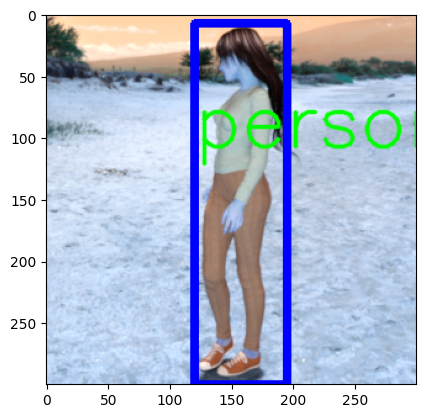

In [8]:
import cv2
image_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/train/humans/human01-00.png'
img = load_image(image_path)
# Transform image
img_tensor = transform_image(img)
# Detect objects
bbox, scores, labels = detect_objects(model, img_tensor)
# Draw bounding boxes and labels
result_img = draw_boxes_and_labels(img, bbox, labels, classnames)
# Display the result
import matplotlib.pyplot as plt
plt.imshow(result_img)


### Applications of Bounding Box Detection

Bounding box detection finds applications across diverse domains, revolutionizing how machines perceive and interact with visual data. Here are some key areas where bounding box detection plays a pivotal role:

- Object Recognition in Autonomous Vehicles: Bounding box detection is crucial for identifying pedestrians, vehicles, and other obstacles in the environment, contributing to the safety and efficiency of autonomous vehicles.
- Security and Surveillance: In video surveillance systems, bounding box detection helps track and analyze the movement of objects or individuals, enhancing security measures.
- Retail Analytics: Bounding box detection is employed in retail settings for tracking and monitoring product movements, managing inventory, and improving the overall shopping experience.
- Medical Image Analysis: Within the field of medical imaging, bounding box detection aids in identifying and localizing abnormalities or specific structures within images, assisting in diagnoses.

This tutorial was made possible by this awesome resource at [geeks for geeks](http://https://www.geeksforgeeks.org/bounding-box-prediction-using-pytorch/)

I thought for sharing this awesome knowledge with you here :) 

I hope you learnt something. Atleast i did :) haha. 

see you in the next one.